<a href="https://colab.research.google.com/github/stephendambo/Dambolin9/blob/Master/Final_Project_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stephendambo","key":"10d74781362db51b4bdba72fe5914678"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset            Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          15738        335  1.0              
nelgiriyewithana/billionaires-statistics-dataset              Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           8456        211  1.0              
jocelyndumlao/consumer-review-of-clothing-product             Consumer Review of Clothing Product                  4MB  2023-10-19 04:45:23            963         26  1.0              
victorahaji/worlds-air-quality-and-water-pollution-dataset    World's Air Q

In [7]:
! kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 85.6MB/s]


In [8]:
! unzip mobile-price-classification

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('/content/train.csv', header = 0)
df.head(5) # This is to check the top 5 data in my train dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
df.shape

(2000, 21)

In [36]:
df.tail(10) # This is to check the last 10 bottom data in my train dataset

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
990,991,1807,0,1.2,0,4,0,37,0.8,162,...,11,246,932,2741,7,1,9,1,1,1
991,992,1797,1,2.6,0,4,0,42,0.6,174,...,20,57,1169,3359,16,6,18,1,1,1
992,993,1895,0,0.5,1,0,1,62,0.9,99,...,0,1019,1698,2563,10,8,13,1,0,1
993,994,567,1,2.7,1,14,1,56,0.4,165,...,17,555,1290,336,7,6,7,1,1,1
994,995,936,1,1.4,1,0,0,46,0.8,139,...,0,265,886,684,8,5,12,1,1,1
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [25]:
df =pd.read_csv('/content/test.csv', header=0)
df.head() # This is to check the top 5 data in my test dataset

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [26]:
df.shape

(1000, 21)

In [53]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [61]:
df_trainset = df #Rename colunm

In [62]:
df_trainset = df_trainset.rename(columns = {'blue': 'bluetooth', 'fc': 'front_cam_pix', 'm_dep': 'mobile_depth', 'n_cores': 'num_of_core', 'pc': 'primary_cam_pix', 'sc_h': 'screen_height', 'sc_w': 'screen_width'})

In [63]:
df_trainset

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,num_of_core,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [64]:
columns_to_delete = ['px_width', 'px_height', 'screen_height', 'screen_width', 'talk_time']
df_trainset = df_trainset.drop(columns_to_delete, axis=1)

In [65]:
df_trainset

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,num_of_core,primary_cam_pix,ram,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,1,1,1,0


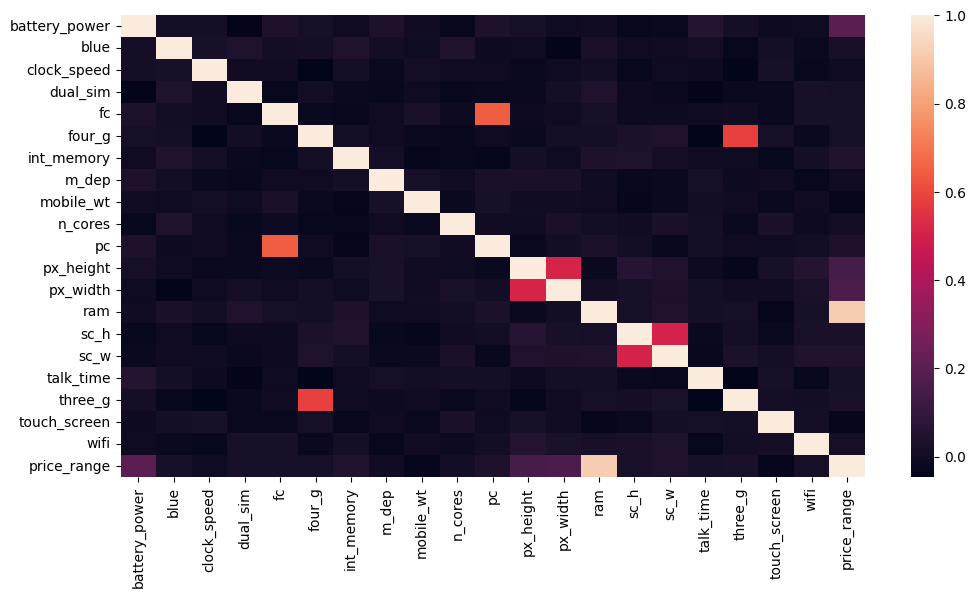

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())
plt.show()

# Plotting Relationship Between Price Range And Battery Power

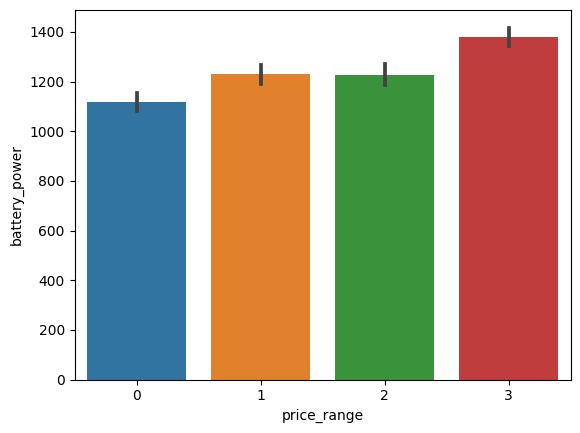

In [71]:
plt.figure(figsize=(6.4,4.8))
sns.barplot(x = 'price_range', y= 'battery_power', data=df)
plt.show()

#Plotting Relationship Between Price Range And Ram

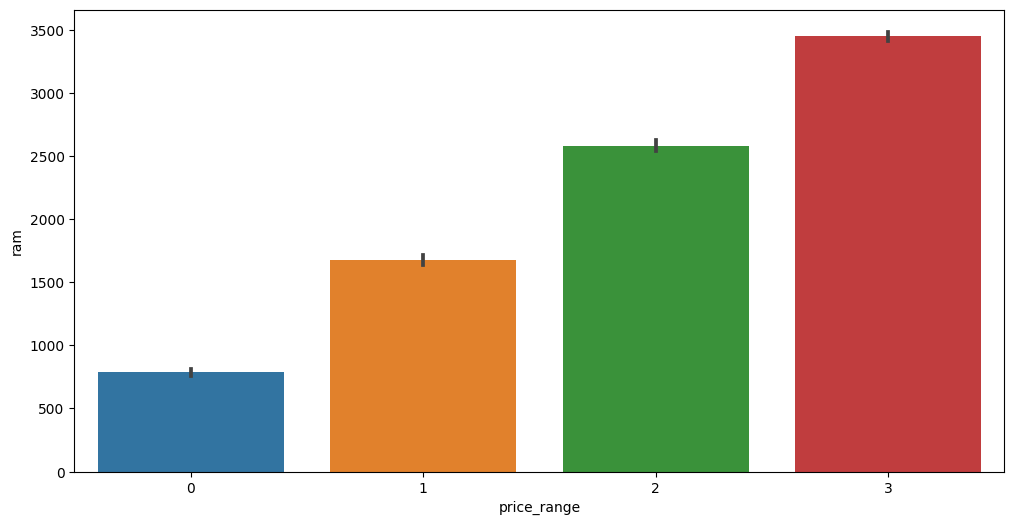

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'price_range', y= 'ram', data=df)
plt.show()

#Plotting Relationship Between Price Range And 3G/4G

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(df['three_g'], hue = df['price_range'], palette='blue')
plt.show()

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

DATA ATTRIBUTES
In this data;
id:ID
battery_power: Total energy a battery can store measured in mAh
blue: Has bleutooth or not
clock_speed: Speed at which microprocessor executes instructions
dual_sim: Has duel sim support or not
fc: Front camera mega pixels
four_g: Has 4G or not
int_memory: Internal memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight Of Mobile Phone
n_cores: Number Of cores Of Processor
pc: Primary Camera Mega Pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Weight
ram: Ramdom Access Memory in Megabytes
sc_h: Screen Height Of Mobile in cm
sc_w: Screen Width Of Mobile in cm
talk_time: Longest time that a single battery charge will last
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not



